In [67]:
#Imports and libraries

import pandas as pd
import numpy as np
from numpy import linalg
import random as rand
import csv
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
from sklearn import preprocessing
import collections
import math
import statistics

import sys  
sys.path.insert(0, '../scripts')
import krippendorff_alpha

sys.path.insert(0, '../scripts')
import bootstrap_workers

sys.path.insert(0, '../scripts/xrr')
from xrr.xrr_class import xRR

sys.path.insert(0, '../scripts/xrr')
import distance_metrics

import warnings
warnings.filterwarnings('ignore')

# Process experiment files and compute stats

In [3]:
# Read the crowd files for the three experiments

# To replicate the analysis, replace LINK_TO_REPETITION1, LINK_TO_REPETITION2, LINK_TO_REPETITION3 with the 
# source files

link1 = '../data/LINK_TO_REPETITION1'
link2 = '../data/LINK_TO_REPETITION2'
link3 = '../data/LINK_TO_REPETITION3'

repetition1 = pd.read_csv(link1)
repetition2 = pd.read_csv(link2)
repetition3 = pd.read_csv(link3)

repetition1 = repetition1.fillna('')
repetition2 = repetition2.fillna('')
repetition3 = repetition3.fillna('')

In [6]:
#Get rater ids and the total number of raters per repetition

workerIds1 = len(list(repetition1)) - 4
workerIds2 = len(list(repetition2)) - 5
workerIds3 = len(list(repetition3)) - 5

print("Number of workers in repetition 1: ", workerIds1)
print("Number of workers in repetition 2: ", workerIds2)
print("Number of workers in repetition 3: ", workerIds3)

Number of workers in repetition 1:  13
Number of workers in repetition 2:  50
Number of workers in repetition 3:  69


In [7]:
#Get statistics about the number of judgments

size1 = len(repetition1)
size2 = len(repetition2)
size3 = len(repetition3)

print("Dataset size repetition 1: ", size1)
print("Dataset size repetition 2: ", size2)
print("Dataset size repetition 3: ", size3)

Dataset size repetition 1:  353
Dataset size repetition 2:  353
Dataset size repetition 3:  353


# Agreement Analysis

In [10]:
#compute Krippendorff's alpha for each experiment
data1 = []
for i in range(3, workerIds1+3):
    data1.append(['*' if x == "" else x for x in list(repetition1.iloc[:,i])])

#print(data)
missing = "*"
kappa = krippendorff_alpha.krippendorff_alpha(data1, metric=krippendorff_alpha.interval_metric, convert_items=float, missing_items=missing)
print("Krippendorff's alpha Repetition 1: ", kappa)


data2 = []
for i in range(2, workerIds2+2):
    data2.append(['*' if x == "" else x for x in list(repetition2.iloc[:,i])])

#print(data)
missing = "*"
kappa = krippendorff_alpha.krippendorff_alpha(data2, metric=krippendorff_alpha.interval_metric, convert_items=float, missing_items=missing)
print("Krippendorff's alpha Repetition 2: ", kappa)

data3 = []
for i in range(2, workerIds3+2):
    data3.append(['*' if x == "" else x for x in list(repetition3.iloc[:,i])])

#print(data)
missing = "*"
kappa = krippendorff_alpha.krippendorff_alpha(data3, metric=krippendorff_alpha.interval_metric, convert_items=float, missing_items=missing)
print("Krippendorff's alpha Repetition 3: ", kappa)

Krippendorff's alpha Repetition 1:  0.5898631032365509
Krippendorff's alpha Repetition 2:  0.5677718030572841
Krippendorff's alpha Repetition 3:  0.49826029856726506


# Precision Analysis

In [12]:
#@title Create a new dataframe with details about the tags in the dataset

tags_df = repetition1[['Word 1', 'Word 2', 'Human (mean)', 'std']]
tags_df["Mean Repetition 2"] = 0.0
tags_df["Std Repetition 2"] = 0.0
tags_df["Mean Repetition 3"] = 0.0
tags_df["Std Repetition 3"] = 0.0

for i in range(len(tags_df)):
    sub2 = repetition2[(repetition2["Word 1"] == tags_df["Word 1"].iloc[i]) & (repetition2["Word 2"] == tags_df["Word 2"].iloc[i])]
    sub3 = repetition3[(repetition3["Word 1"] == tags_df["Word 1"].iloc[i]) & (repetition3["Word 2"] == tags_df["Word 2"].iloc[i])]

    tags_df["Mean Repetition 2"].iloc[i] = sub2["WS353-1 mean"].iloc[0]
    tags_df["Std Repetition 2"].iloc[i] = sub2["WS353-1 STDV"].iloc[0]
    tags_df["Mean Repetition 3"].iloc[i] = sub3["WS353-2 mean"].iloc[0]
    tags_df["Std Repetition 3"].iloc[i] = sub3["WS353-2 STDV"].iloc[0]

tags_df.to_csv("../data/WS353_precision_analysis.csv", index=False)

tags_df.head(10)

,Word 1,Word 2,Human (mean),std,Mean Repetition 2,Std Repetition 2,Mean Repetition 3,Std Repetition 3
0,admission,ticket,7.923077,1.255756,8.038462,1.626109,6.346154,1.748626
1,alcohol,chemistry,5.538462,1.853617,3.807692,2.323238,3.461538,2.461889
2,aluminum,metal,7.865385,1.102000,8.807692,1.216869,8.384615,1.697472
3,announcement,effort,2.769231,1.739000,2.692308,2.005601,2.230769,1.628079
4,announcement,news,7.538462,0.967000,8.500000,1.457738,7.923077,2.540064
5,announcement,production,3.230769,1.878000,3.038462,2.358156,2.653846,2.568922
6,announcement,warning,6.076923,1.706000,7.384615,2.093182,7.192308,3.079086
7,Arafat,Jackson,2.500000,2.345000,1.115385,1.569950,0.846154,0.987096
8,Arafat,peace,6.730769,2.068000,1.192308,1.182132,1.923077,1.823985
9,Arafat,terror,7.653846,1.700000,4.307692,3.485317,2.615385,2.844247


In [13]:
#Compute the mean of standard deviations
exp1_mean_stdev = sum(tags_df["std"])/len(tags_df["std"])
print("Mean of standard deviations - repetition 1: ", exp1_mean_stdev)

exp2_mean_stdev = sum(tags_df["Std Repetition 2"])/len(tags_df["Std Repetition 2"])
print("Mean of standard deviations - repetition 2: ", exp2_mean_stdev)

exp3_mean_stdev = sum(tags_df["Std Repetition 3"])/len(tags_df["Std Repetition 3"])
print("Mean of standard deviations - repetition 3: ", exp3_mean_stdev)

Mean of standard deviations - repetition 1:  1.7041908594059507
Mean of standard deviations - repetition 2:  2.062019367649859
Mean of standard deviations - repetition 3:  2.184191981800565


In [14]:
#compute the standard deviation of deviations
exp1_stdev_stdev = statistics.stdev(tags_df["std"])
print("Standard deviation of stdevs - repetition 1:", exp1_stdev_stdev)

exp2_stdev_stdev = statistics.stdev(tags_df["Std Repetition 2"])
print("standard deviation of stdevs - repetition 2:", exp2_stdev_stdev)

exp3_stdev_stdev = statistics.stdev(tags_df["Std Repetition 3"])
print("standard deviation of stdevs - repetition 3:", exp3_stdev_stdev)

Standard deviation of stdevs - repetition 1: 0.5444626917892446
standard deviation of stdevs - repetition 2: 0.6898426260821217
standard deviation of stdevs - repetition 3: 0.6152745516005854


In [15]:
#compute the percentage of tags in [mean-stdev, mean+stdev]
from scipy.stats import spearmanr

event1_no = len(tags_df[(tags_df["Human (mean)"] >= sum(tags_df["std"])/len(tags_df["std"]) - statistics.stdev(tags_df["std"])) & (tags_df["Human (mean)"] <= sum(tags_df["std"])/len(tags_df["std"]) + statistics.stdev(tags_df["std"]))]) * 100 / len(tags_df)
event2_no = len(tags_df[(tags_df["Mean Repetition 2"] >= sum(tags_df["Std Repetition 2"])/len(tags_df["Std Repetition 2"])- statistics.stdev(tags_df["Std Repetition 2"])) & (tags_df["Mean Repetition 2"] <= sum(tags_df["Std Repetition 2"])/len(tags_df["Std Repetition 2"]) + statistics.stdev(tags_df["Std Repetition 2"]))]) * 100 / len(tags_df)
event3_no = len(tags_df[(tags_df["Mean Repetition 3"] >= sum(tags_df["Std Repetition 3"])/len(tags_df["Std Repetition 3"]) - statistics.stdev(tags_df["Std Repetition 3"])) & (tags_df["Mean Repetition 3"] <= sum(tags_df["Std Repetition 3"])/len(tags_df["Std Repetition 3"]) + statistics.stdev(tags_df["Std Repetition 3"]))]) * 100 / len(tags_df)
print("Word Similarity:", event1_no, event2_no, event3_no)


Word Similarity: 5.665722379603399 14.164305949008499 16.997167138810198


In [19]:
#compute the difference in mean relevance score between every two repetitions
tags_df["Diff_1_2"] = abs(round(tags_df["Human (mean)"] - tags_df["Mean Repetition 2"], 4))
tags_df["Diff_1_3"] = abs(round(tags_df["Human (mean)"] - tags_df["Mean Repetition 3"], 4))
tags_df["Diff_2_3"] = abs(round(tags_df["Mean Repetition 2"] - tags_df["Mean Repetition 3"], 4))

In [21]:
tags_df.sort_values(by=["Diff_1_2"], ascending=False)

,Word 1,Word 2,Human (mean),std,Mean Repetition 2,Std Repetition 2,Mean Repetition 3,Std Repetition 3,Diff_1_2,Diff_1_3,Diff_2_3
8,Arafat,peace,6.730769,2.068,1.192308,1.182132,1.923077,1.823985,5.5385,4.8077,0.7308
34,car,flight,5.384615,1.758,0.653846,0.987096,3.076923,2.090117,4.7308,2.3077,2.4231
149,Japanese,American,6.846154,1.420,2.346154,2.461238,3.000000,2.466441,4.5000,3.8462,0.6538
178,Maradona,football,8.615385,1.139,4.192308,3.556323,2.884615,2.701495,4.4231,5.7308,1.3077
188,minister,party,6.692308,1.964,2.384615,2.709196,2.115385,2.399252,4.3077,4.5769,0.2692
...,...,...,...,...,...,...,...,...,...,...,...
211,movie,theater,7.923077,1.272,7.923077,1.869115,8.423077,1.718116,0.0000,0.5000,0.5000
145,investigation,effort,4.346154,2.304,4.346154,2.339735,3.576923,1.987944,0.0000,0.7692,0.7692
333,tiger,tiger,10.000000,0.000,10.000000,0.000000,9.884615,0.416025,0.0000,0.1154,0.1154
160,law,lawyer,8.384615,1.309,8.384615,1.277267,7.769231,2.027061,0.0000,0.6154,0.6154


In [22]:
tags_df.sort_values(by=["Diff_1_3"], ascending=False)

,Word 1,Word 2,Human (mean),std,Mean Repetition 2,Std Repetition 2,Mean Repetition 3,Std Repetition 3,Diff_1_2,Diff_1_3,Diff_2_3
178,Maradona,football,8.615385,1.139,4.192308,3.556323,2.884615,2.701495,4.4231,5.7308,1.3077
9,Arafat,terror,7.653846,1.700,4.307692,3.485317,2.615385,2.844247,3.3462,5.0385,1.6923
80,deployment,departure,4.153846,2.304,8.038462,2.145359,9.076923,1.115164,3.8846,4.9231,1.0385
8,Arafat,peace,6.730769,2.068,1.192308,1.182132,1.923077,1.823985,5.5385,4.8077,0.7308
188,minister,party,6.692308,1.964,2.384615,2.709196,2.115385,2.399252,4.3077,4.5769,0.2692
...,...,...,...,...,...,...,...,...,...,...,...
246,precedent,collection,2.500000,2.582,2.269231,2.323928,2.538462,2.164693,0.2308,0.0385,0.2692
112,fertility,egg,6.692308,1.932,6.384615,2.433737,6.653846,2.409915,0.3077,0.0385,0.2692
315,sugar,approach,0.923077,1.498,0.153846,0.240192,0.884615,1.416478,0.7692,0.0385,0.7308
243,practice,institution,3.307692,1.974,4.500000,2.245366,3.307692,2.742706,1.1923,0.0000,1.1923


In [23]:
tags_df.sort_values(by=["Diff_2_3"], ascending=False)

,Word 1,Word 2,Human (mean),std,Mean Repetition 2,Std Repetition 2,Mean Repetition 3,Std Repetition 3,Diff_1_2,Diff_1_3,Diff_2_3
203,monk,oracle,5.000000,2.082,3.692308,3.031353,6.730769,1.763228,1.3077,1.7308,3.0385
34,car,flight,5.384615,1.758,0.653846,0.987096,3.076923,2.090117,4.7308,2.3077,2.4231
168,listing,category,6.538462,2.295,7.384615,1.850156,5.115385,3.150092,0.8462,1.4231,2.2692
269,psychology,Freud,8.211538,1.346,7.615385,2.180920,5.346154,2.640901,0.5962,2.8654,2.2692
328,tiger,fauna,5.615385,2.866,2.615385,2.909423,4.692308,3.727926,3.0000,0.9231,2.0769
...,...,...,...,...,...,...,...,...,...,...,...
177,man,woman,8.826923,0.850,7.000000,3.208063,6.961538,2.045947,1.8269,1.8654,0.0385
179,marathon,sprint,7.423077,1.152,6.192308,2.926449,6.153846,1.546294,1.2308,1.2692,0.0385
212,murder,manslaughter,8.338462,1.765,8.692308,1.762319,8.730769,1.576063,0.3538,0.3923,0.0385
72,currency,market,7.230769,1.218,5.730769,2.773501,5.730769,2.898386,1.5000,1.5000,0.0000


In [65]:
rep2

,ItemIndex,Word 1,Word 2,Repetition,Rater,RaterIndex,Similarity
4589,1,admission,ticket,repetition2,51,A14I3K8UN3612X,7.5
4590,1,admission,ticket,repetition2,90,A17D6BK59S31BM,9.0
4591,1,admission,ticket,repetition2,64,A1GKEEI844CEKI,6.5
4592,1,admission,ticket,repetition2,5,A1SWRO4LMKPCOQ,5.0
4593,1,admission,ticket,repetition2,21,A2O2Q0LVWOWJ1G,9.5
...,...,...,...,...,...,...,...
9185,353,word,similarity,repetition2,11,A37WDOIQH6JM6V,0.5
9186,353,word,similarity,repetition2,12,A38DXFI1TZA295,6.5
9187,353,word,similarity,repetition2,61,A3B58QWMTBXVE0,4.0
9188,353,word,similarity,repetition2,26,A3BI0AX5T5GVO3,6.0


# Stability Analysis

In [24]:
#compute the Spearman's rank correlation
from scipy.stats import spearmanr

rho, pval = spearmanr(tags_df["Human (mean)"], tags_df["Mean Repetition 2"], axis=1)
print("Spearman's rank correlation between repetition 1 & repetition 2:", round(rho, 4), round(pval, 4))

rho, pval = spearmanr(tags_df["Human (mean)"], tags_df["Mean Repetition 3"], axis=1)
print("Spearman's rank ccorrelation between repetition 1 & repetition 3:", round(rho, 4), round(pval, 4))

rho, pval = spearmanr(tags_df["Mean Repetition 2"], tags_df["Mean Repetition 3"], axis=1)
print("Spearman's rank ccorrelation between repetition 2 & repetition 3:", round(rho, 4), round(pval, 4))


Spearman's rank correlation between repetition 1 & repetition 2: 0.868 0.0
Spearman's rank ccorrelation between repetition 1 & repetition 3: 0.8419 0.0
Spearman's rank ccorrelation between repetition 2 & repetition 3: 0.9518 0.0


In [25]:
#compute the correlation of standard deviations - Pearson correlation
from scipy.stats import pearsonr

rho, pval = pearsonr(tags_df["std"], tags_df["Std Repetition 2"])
print("Pearson correlation between repetition 1 & repetition 2: ", round(rho, 4), round(pval, 4))

rho, pval = pearsonr(tags_df["std"], tags_df["Std Repetition 3"])
print("Pearson correlation between repetition 1 & repetition 3: ", round(rho, 4), round(pval, 4))

rho, pval = pearsonr(tags_df["Std Repetition 2"], tags_df["Std Repetition 3"])
print("Pearson correlation between repetition 2 & repetition 3: ", round(rho, 4), round(pval, 4))

Pearson correlation between repetition 1 & repetition 2:  0.2609 0.0
Pearson correlation between repetition 1 & repetition 3:  0.1177 0.027
Pearson correlation between repetition 2 & repetition 3:  0.5335 0.0


# Replicability Similarity Analysis

In [28]:
# prepare data to apply xRR analysis
# concatenate results of all three repetitions
columns = ["ItemIndex", "Word 1", "Word 2", "Repetition", "Rater", "RaterIndex", "Similarity"]

dictItems = {}
dictRaters = {}

indexItems = 1
for i in range(len(tags_df)):
    dictItems[tags_df["Word 1"].iloc[i] + "-" + tags_df["Word 2"].iloc[i]] = indexItems
    indexItems += 1

indexRaters = 1
allworkers = list(set(list(repetition1.columns[3:-1]) + list(repetition2.columns[2:-3]) + list(repetition3.columns[2:-3])))
for worker in allworkers:
    dictRaters[worker] = indexRaters
    indexRaters += 1

rows = []
workers = repetition1.columns[3:-1]
itemIndex = 1

for i in range(len(repetition1)):
    for worker in workers:
        row = [dictItems[repetition1["Word 1"].iloc[i] + "-" + repetition1["Word 2"].iloc[i]], repetition1["Word 1"].iloc[i], repetition1["Word 2"].iloc[i], "repetition1", dictRaters[worker], worker, float(repetition1[worker].iloc[i])]
        rows.append(row)

workers = repetition2.columns[2:-3]
itemIndex = 1

for i in range(len(repetition2)):
    for worker in workers:
        if repetition2[worker].iloc[i] != "":
            row = [dictItems[repetition2["Word 1"].iloc[i] + "-" + repetition2["Word 2"].iloc[i]], repetition2["Word 1"].iloc[i], repetition2["Word 2"].iloc[i], "repetition2", dictRaters[worker], worker, float(repetition2[worker].iloc[i])]
            rows.append(row)

workers = repetition3.columns[2:-3]
itemIndex = 1

for i in range(len(repetition3)):
    for worker in workers:
        if repetition3[worker].iloc[i] != "":
            row = [dictItems[repetition3["Word 1"].iloc[i] + "-" + repetition3["Word 2"].iloc[i]], repetition3["Word 1"].iloc[i], repetition3["Word 2"].iloc[i], "repetition3", dictRaters[worker], worker, float(repetition3[worker].iloc[i])]
            rows.append(row)

xrr_df = pd.DataFrame.from_records(rows)
xrr_df.columns = columns

xrr_df.to_csv("../data/WS353_xrr.csv", index=False)


In [37]:
rep1 = xrr_df[xrr_df["Repetition"] == "repetition1"]
rep2 = xrr_df[xrr_df["Repetition"] == "repetition2"]
rep3 = xrr_df[xrr_df["Repetition"] == "repetition3"]

In [48]:
from xrr.xrr_class import xRR

xRR_matrix = np.ones((3, 3), dtype = float)

xRR_object_12 = xRR(rep1, rep2, "Similarity", "Rater", "ItemIndex", distance_metrics.interval)
xRR_matrix[1, 0] = round(xRR_object_12.kappa_x(), 4)
xRR_object_13 = xRR(rep1, rep3, "Similarity", "Rater", "ItemIndex", distance_metrics.interval)
xRR_matrix[2, 0] = round(xRR_object_13.kappa_x(), 4)
xRR_object_23 = xRR(rep2, rep3, "Similarity", "Rater", "ItemIndex", distance_metrics.interval)
xRR_matrix[2, 1] = round(xRR_object_23.kappa_x(), 4)

print("xRR score between Repetition 1 and Repetition 2 raters:", round(xRR_object_12.kappa_x(), 4))
print("xRR score between Repetition 1 and Repetition 3 raters:", round(xRR_object_13.kappa_x(), 4))
print("xRR score between Repetition 2 and Repetition 3 raters:", round(xRR_object_23.kappa_x(), 4))

xRR_matrix

22/08/2023 11:39:46  observed disagreement: 9.834189328504621
22/08/2023 11:39:47  expected disagreement: 19.4664247884509
22/08/2023 11:39:47  observed disagreement: 10.649960768818566
22/08/2023 11:39:48  expected disagreement: 19.128746731560376
22/08/2023 11:39:48  observed disagreement: 9.797840778403376
22/08/2023 11:39:49  expected disagreement: 21.057488556996297


xRR score between Repetition 1 and Repetition 2 raters: 0.4948
xRR score between Repetition 1 and Repetition 3 raters: 0.4432
xRR score between Repetition 2 and Repetition 3 raters: 0.5347


array([[1.    , 1.    , 1.    ],
       [0.4948, 1.    , 1.    ],
       [0.4432, 0.5347, 1.    ]])

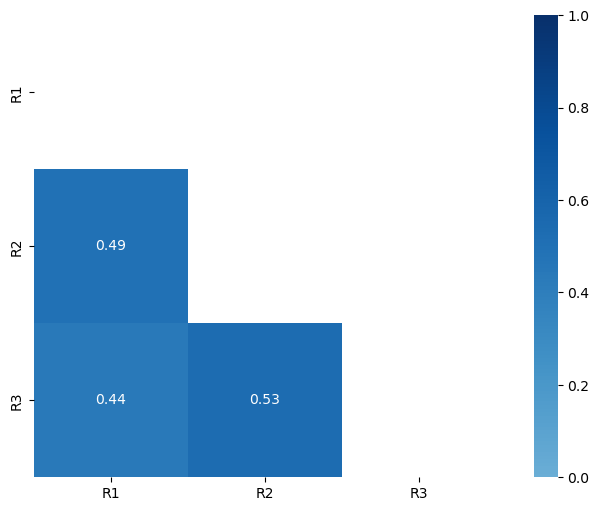

In [49]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

columns = ["R1", "R2", "R3"]

df_data = pd.DataFrame(xRR_matrix, columns = columns)

# Create a mask
mask = np.triu(np.ones_like(df_data, dtype=bool))

plt.figure(figsize=(10, 6))
sns.heatmap(df_data, mask=mask, center=0, annot=True,
            fmt='.2f', square=True, cmap="Blues", yticklabels=["R1", "R2", "R3"], 
            vmin=0.0, vmax=1.0)

plt.savefig("../plots/xRR_WS353.png",  bbox_inches='tight', format='png', dpi=1200)
plt.show()

# Power analysis

In [73]:
#Functions used to generate sets of workers per item

def get_uniq_unit_ids(df):
    unique_unit_ids = df["ItemIndex"].unique()
    return unique_unit_ids

def get_no_work_unit_id(df, unit_id):
    subset_unit_id = df[df["ItemIndex"] == unit_id]
    return (len(subset_unit_id), subset_unit_id)

def count_bits(number, n_bits):
    ret = 0
    bit_pos = []
    for i in range(0, n_bits):
        if (1 << i) & number != 0:
            ret += 1
            bit_pos.append(i)
    return (ret, bit_pos)

def gen_all_k_combinations(k, num_size):
    result = []
    for i in range(1, 2**num_size):
        bit_count, bit_pos = count_bits(i, num_size)
        if bit_count == k:
            result.append(bit_pos)
    return result

def gen_all_worker_combinations(subset_size, count, subset_unit_id):
    combinations = gen_all_k_combinations(subset_size, count)
    final_result = []
    for comb in combinations:
        crnt_workers = []
        for j in range(0, len(comb)):
            crnt_workers.append(subset_unit_id["Rater"].iloc[comb[j]])
        final_result.append(crnt_workers)
    return final_result

def get_all_unit_combinations(unit_dict):
    sorted_unit_dict = sorted(unit_dict)
    combinations = it.product(*(unit_dict[unit_id] for unit_id in sorted_unit_dict))
    #print(list(combinations))

def my_product(dicts):
    units, comb_of_workers = zip(*dicts.items())
    return [dict(zip(units, x)) for x in it.product(*comb_of_workers)]

def pick_random_worker_set(worker_sets):
    return random.choice(worker_sets)



In [74]:
# Running this cell takes a considerable amount of time; To continue the analysis, move to the next cell;
# Bootstrap experiments - experiment with the number of raters per item
import statistics as sts

def bootstrap_experiments(repetition, repetitionId):
    unique_unit_ids = get_uniq_unit_ids(repetition)

    workers_units = {}
    for unit in unique_unit_ids:
        subset = repetition[repetition["ItemIndex"] == unit]
        workers_units[unit] = list(set(subset["Rater"]))

    alpha_values = {}
    mean_values = {}
    stdev_values = {}
    variance_values = {}

    columns_df = ["No Workers"]
    columns_df.extend(["Run %s" % i for i in range(1,101)])
    columns_df.extend(["Mean", "Stdev", "Variance", "Median", "Min", "Max"])

    with open('../data/bootstrap_workers_IRR_WS353_' + repetitionId + '.csv','w') as f:
        writer = csv.writer(f)
        writer.writerow(columns_df)

    df_study = []

    for subset_size in range(3, 13):
        row_df = [subset_size]
        map_unit_id_combinations = {}
        alpha_values[subset_size] = []
        mean_values[subset_size] = {}
        stdev_values[subset_size] = {}
        variance_values[subset_size] = {}

        for run_no in range(0, 100):
            current_comb = []
            for unit_id in unique_unit_ids:
                list_w = random.sample(list(set(repetition["Rater"])), subset_size)
         

                for item in list_w:
                    subset = repetition[(repetition["Rater"] == item) & (repetition["ItemIndex"] == unit_id)]
                    current_comb.append(list(subset["Similarity"]))

            alpha = krippendorff_alpha.krippendorff_alpha(current_comb, metric=krippendorff_alpha.interval_metric, missing_items=missing)
            alpha_values[subset_size].append(alpha)
            row_df.append(alpha)

        mean_values[subset_size] = sum(alpha_values[subset_size])/len(alpha_values[subset_size])
        stdev_values[subset_size] = sts.stdev(alpha_values[subset_size])
        variance_values[subset_size] = sts.variance(alpha_values[subset_size])

        row_df.append(mean_values[subset_size])
        row_df.append(stdev_values[subset_size])
        row_df.append(variance_values[subset_size])

        with open('../data/bootstrap_workers_IRR_WS353_' + repetitionId + '.csv','a') as f:
            writer = csv.writer(f)
            writer.writerow(row_df)

#uncomment these lines if you want to run the cell
#bootstrap_experiments(rep1, 'rep1')
#bootstrap_experiments(rep2, 'rep2')
#bootstrap_experiments(rep3, 'rep3')


In [78]:
#chi-square test for the variance (H0: sigma < sigma_0)

#H0: sigma >= 0.01
#Ha: sigma < 0.01
# large values of chi square give us evidence against the null hypothesis
link1 = '../data/bootstrap_workers_IRR_WS353_rep1.csv'
link2 = '../data/bootstrap_workers_IRR_WS353_rep2.csv'
link3 = '../data/bootstrap_workers_IRR_WS353_rep3.csv'

bootstrap1 = pd.read_csv(link1)
bootstrap2 = pd.read_csv(link2)
bootstrap3 = pd.read_csv(link3)

def power_analysis(repetition):
    for i in range(len(repetition)):

        N = 100 #numnber of samples
        values = repetition.iloc[i,1:101]
        s = statistics.stdev(values) 
        delta = 0.01

        chi_square = (N - 1) * s * s / (delta * delta)
        dof = N - 1
        alpha = 0.05

        from scipy.stats import chi2
        p_value = 1 - stats.chi2.cdf(chi_square, dof)

        if p_value >= alpha:
            print("reject the null hypothesis for ", repetition["No Workers"].iloc[i], p_value)
        else:
            print("do not reject the null hypothesis for", repetition["No Workers"].iloc[i], p_value)


In [80]:
print("\nRepetition 1:")
power_analysis(bootstrap1)

print("\nRepetition 2:")
power_analysis(bootstrap2)

print("\nRepetition 3:")
power_analysis(bootstrap3)


Repetition 1:
do not reject the null hypothesis for 3 0.0
do not reject the null hypothesis for 4 0.0
do not reject the null hypothesis for 5 0.0
do not reject the null hypothesis for 6 0.0
do not reject the null hypothesis for 7 0.0
do not reject the null hypothesis for 8 0.0
do not reject the null hypothesis for 9 0.0
do not reject the null hypothesis for 10 0.0
do not reject the null hypothesis for 11 6.987510570155564e-11
reject the null hypothesis for  12 0.7965157380051695

Repetition 2:
do not reject the null hypothesis for 3 0.0
do not reject the null hypothesis for 4 2.220446049250313e-16
reject the null hypothesis for  5 0.05398360713843586
do not reject the null hypothesis for 6 0.03931089727464987
reject the null hypothesis for  7 0.5738220200473569
reject the null hypothesis for  8 0.9945886098140883
reject the null hypothesis for  9 0.9999999998865962
reject the null hypothesis for  10 0.9999999999997081
reject the null hypothesis for  11 1.0
reject the null hypothesis f

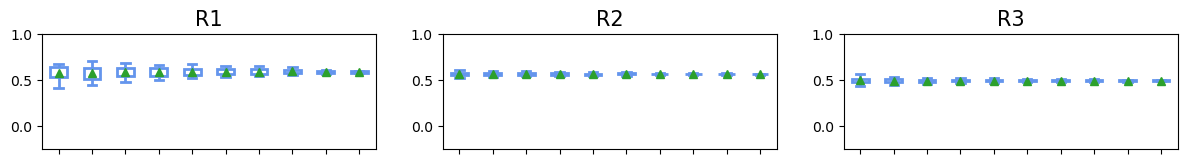

In [83]:
#plot the alpha values for every number of workers (in experiment 1)
def data_to_plot(dataframe):
    labels = list(dataframe["No Workers"])

    data = []
    for i in range(len(dataframe)):
        data.append(list(dataframe.iloc[i,1:101]))

    return labels, data

def draw_boxplots(ax, data_to_plot, labels, title_text):
    bp = ax.boxplot(data_to_plot, showmeans=True, patch_artist=True, showfliers=False)

    ## change outline color, fill color and linewidth of the boxes
    for box in bp['boxes']:
        # change outline color
        box.set( color='cornflowerblue', linewidth=2)
        # change fill color
        box.set( facecolor = 'white' )

    ## change color and linewidth of the whiskers
    for whisker in bp['whiskers']:
        whisker.set(color='cornflowerblue', linewidth=2,linestyle='--')

    ## change color and linewidth of the caps
    for cap in bp['caps']:
        cap.set(color='cornflowerblue', linewidth=2)

    ## change color and linewidth of the medians
    for median in bp['medians']:
        median.set(color='white', linewidth=0)

    ## change color and linewidth of the means
    for mean in bp['means']:
        mean.set(color='red')

    ## change the style of fliers and their fill
    for flier in bp['fliers']:
        flier.set(marker='o', color='blue', alpha=0.5)

    ax.set_xticklabels([])
    ax.set_ylim([-0.25,1])
    ax.get_yaxis().tick_left()
    ax.set_title(title_text, fontsize=15)

link1 = '../data/bootstrap_workers_IRR_WS353_rep1.csv'
link2 = '../data/bootstrap_workers_IRR_WS353_rep2.csv'
link3 = '../data/bootstrap_workers_IRR_WS353_rep3.csv'

bootstrap1 = pd.read_csv(link1)
bootstrap2 = pd.read_csv(link2)
bootstrap3 = pd.read_csv(link3)


fig = plt.figure(1, figsize=(25, 1.5))

ax = fig.add_subplot(151)
labels, data = data_to_plot(bootstrap1)
draw_boxplots(ax, data, labels, "R1")

ax = fig.add_subplot(152)
labels, data = data_to_plot(bootstrap2)
draw_boxplots(ax, data, labels, "R2")

ax = fig.add_subplot(153)
labels, data = data_to_plot(bootstrap3)
draw_boxplots(ax, data, labels, "R3")


fig.savefig("../plots/bootstrap_workers_replications_WS353.png",  bbox_inches='tight', format='png', dpi=1200)